### Multilabel Classification with Python

##### Multilabel Dataset Examples
+ https://sci2s.ugr.es/keel/multilabel.php#sub10



![](https://github.com/Jcharis/Python-Machine-Learning/blob/master/Multi_Label_Text_Classification_with_Skmultilearn/multi-class_vs_multi_label_classification_jcharistech.png?raw=1)

#### Solution for Multi-Label Problem
+ Methods for solving Multi-label Classification Problems
    + Problem Transformation
    + Adapted Algorithm
    + Ensemble approaches

#### Problem Transformation
+ It refers to transforming the multi-label problem into single-label problem(s) by using
    - Binary Relevance: treats each label as a separate single class classification
    - Classifier Chains:In this, the first classifier is trained just on the input data and then each next classifier is trained on the input space and all the previous classifiers in the chain.
    - Label Powerset:we transform the problem into a multi-class problem with one multi-class classifier is trained on all unique label combinations found in the training data.

        
#### Adapted Algorithm
+ adapting the algorithm to directly perform multi-label classification, rather than transforming the problem into different subsets of problems.
   

In [248]:
# Load EDA Pkgs
import pandas as pd
import numpy as np

In [249]:
# Load Data Viz Pkgs
import matplotlib.pyplot as plt
import seaborn as sns

In [250]:
# ML Pkgs
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.metrics import accuracy_score,hamming_loss,classification_report

In [251]:
### Split Dataset into Train and Text
from sklearn.model_selection import train_test_split
# Feature engineering
from sklearn.feature_extraction.text import TfidfVectorizer

In [252]:
# Multi Label Pkgs
from skmultilearn.problem_transform import BinaryRelevance
from skmultilearn.problem_transform import ClassifierChain
from skmultilearn.problem_transform import LabelPowerset
from skmultilearn.adapt import MLkNN


In [253]:
pip install scikit-multilearn

In [254]:
# Load Dataset
# df = pd.read_csv('https://raw.githubusercontent.com/nagappanm/Python-Machine-Learning/master/Multi_Label_Text_Classification_with_Skmultilearn/data/so_dataset_2_tags.csv')
#df = pd.read_csv('https://raw.githubusercontent.com/laxmimerit/All-CSV-ML-Data-Files-Download/master/stackoverflow.csv')
# df = pd.read_csv('https://raw.githubusercontent.com/nagappanm/Python-Machine-Learning/master/Multi_Label_Text_Classification_with_Skmultilearn/data/so_dataset_updated.csv')
df = pd.read_csv('https://raw.githubusercontent.com/nagappanm/Python-Machine-Learning/master/Multi_Label_Text_Classification_with_Skmultilearn/data/so_dataset_updated_blank.csv')


In [255]:
df.head()

,title,tags,Tagsupdated,mysql,python,php
0,Flask-SQLAlchemy - When are the tables/databas...,"['python', 'mysql']","python, mysql",1,1,0
1,Combining two PHP variables for MySQL query,"['php', 'mysql']","php, mysql",1,0,1
2,'Counting' the number of records that match a ...,"['php', 'mysql']","php, mysql",1,0,1
3,Insert new row in a table and auto id number. ...,"['php', 'mysql']","php, mysql",1,0,1
4,Create Multiple MySQL tables using PHP,"['php', 'mysql']","php, mysql",1,0,1


In [256]:
df.loc[0].title

'Flask-SQLAlchemy - When are the tables/databases created and destroyed?'

In [257]:
df.dtypes

title          object
tags           object
Tagsupdated    object
mysql           int64
python          int64
php             int64
dtype: object

In [258]:
# Convert to Float
df['mysql'] = df['mysql'].astype(float)

In [259]:
df.dtypes

title           object
tags            object
Tagsupdated     object
mysql          float64
python           int64
php              int64
dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


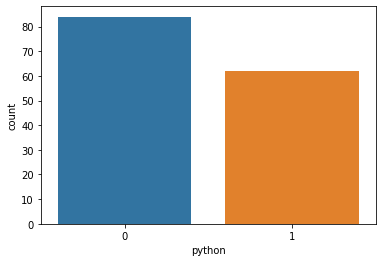

In [260]:
# Value Count 
sns.countplot(df['python'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


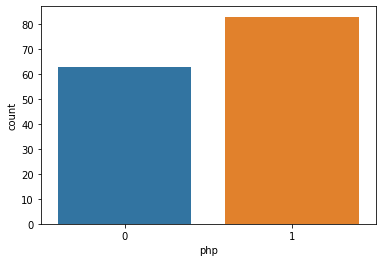

In [261]:
# Value Count 
sns.countplot(df['php'])

In [262]:
df['php'].value_counts()

1    83
0    63
Name: php, dtype: int64

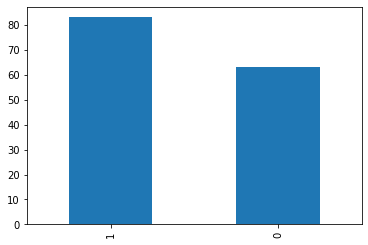

In [263]:
df['php'].value_counts().plot(kind='bar')

### Text Preprocessing
+ neattext : remove_stopwords
+ pip install neattext

In [264]:

import neattext as nt
import neattext.functions as nfx

In [265]:
pip install neattext

In [266]:
# Explore For Noise
df['title'].apply(lambda x:nt.TextFrame(x).noise_scan())

0      {'text_noise': 11.267605633802818, 'text_lengt...
1      {'text_noise': 4.651162790697675, 'text_length...
2      {'text_noise': 9.90990990990991, 'text_length'...
3      {'text_noise': 8.47457627118644, 'text_length'...
4      {'text_noise': 2.631578947368421, 'text_length...
                             ...                        
141    {'text_noise': 6.666666666666667, 'text_length...
142    {'text_noise': 13.636363636363635, 'text_lengt...
143    {'text_noise': 7.142857142857142, 'text_length...
144    {'text_noise': 7.142857142857142, 'text_length...
145    {'text_noise': 7.142857142857142, 'text_length...
Name: title, Length: 146, dtype: object

In [267]:
# Explore For Noise
df['title'].apply(lambda x:nt.TextExtractor(x).extract_stopwords())

0                                [when, are, the, and]
1                                           [two, for]
2                    [the, of, that, a, and, the, and]
3                                    [in, a, and, and]
4                                              [using]
                            ...                       
141                                  [and, get, using]
142    [how, to, the, of, a, with, a, back, into, the]
143                                           [in, if]
144                                           [in, if]
145                                           [in, if]
Name: title, Length: 146, dtype: object

In [268]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [269]:
# Explore For Noise
df['title'].apply(nfx.remove_stopwords)

0      Flask-SQLAlchemy - tables/databases created de...
1                    Combining PHP variables MySQL query
2      'Counting' number records match certain criter...
3         Insert new row table auto id number. Php MySQL
4                       Create Multiple MySQL tables PHP
                             ...                        
141                      mysql Count Distinct result php
142    store result radio button database value, data...
143                 Use SQL count result statement - PHP
144                 Use SQL count result statement - PHP
145                 Use SQL count result statement - PHP
Name: title, Length: 146, dtype: object

In [270]:
corpus = df['title'].apply(nfx.remove_stopwords)

### Feature Engineering
+ Build features from our text
+ TFIDF,countvectorizer,bow

In [271]:
tfidf = TfidfVectorizer()

In [272]:
tfidf

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [273]:
# Build Features
Xfeatures = tfidf.fit_transform(corpus).toarray()

In [274]:
Xfeatures

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [275]:
df.head()

,title,tags,Tagsupdated,mysql,python,php
0,Flask-SQLAlchemy - When are the tables/databas...,"['python', 'mysql']","python, mysql",1.0,1,0
1,Combining two PHP variables for MySQL query,"['php', 'mysql']","php, mysql",1.0,0,1
2,'Counting' the number of records that match a ...,"['php', 'mysql']","php, mysql",1.0,0,1
3,Insert new row in a table and auto id number. ...,"['php', 'mysql']","php, mysql",1.0,0,1
4,Create Multiple MySQL tables using PHP,"['php', 'mysql']","php, mysql",1.0,0,1


In [276]:
# y = df[['mysql', 'python', 'php']]
# y



In [277]:
type(df['Tagsupdated'].iloc[0])


str

In [278]:
import ast
# df = pd.read_csv('https://raw.githubusercontent.com/nagappanm/Python-Machine-Learning/master/Multi_Label_Text_Classification_with_Skmultilearn/data/so_dataset_updated_blank.csv')
# df['tags'] = df['tags'].apply(lambda x: ast.literal_eval(x))
df['Tagsupdated']=df['Tagsupdated'].fillna("")
df['Tagsupdated'] = df['Tagsupdated'].apply(lambda x: x.split(','))
df.head()
df.tail()

,title,tags,Tagsupdated,mysql,python,php
141,mysql Count Distinct and get result using php,"['php', 'mysql']","[php, mysql]",1.0,0,1
142,How to store the result of a radio button with...,"['php', 'mysql']","[php, mysql]",1.0,0,1
143,Use SQL count result in IF statement - PHP,"['php', 'mysql']","[php, mysql]",1.0,0,1
144,Use SQL count result in IF statement - PHP,['php'],[php],0.0,0,1
145,Use SQL count result in IF statement - PHP,NaN,[],0.0,0,0


In [279]:
type(df['Tagsupdated'].iloc[0])

list

In [280]:
from sklearn.preprocessing import MultiLabelBinarizer
multilabel = MultiLabelBinarizer()
y = multilabel.fit_transform(df['Tagsupdated'])
y

array([[0, 1, 0, 1],
       [0, 1, 1, 0],
       [0, 1, 1, 0],
       [0, 1, 1, 0],
       [0, 1, 1, 0],
       [0, 1, 1, 0],
       [0, 1, 1, 0],
       [0, 1, 0, 1],
       [0, 1, 0, 1],
       [0, 1, 1, 0],
       [0, 1, 0, 1],
       [0, 1, 0, 1],
       [0, 1, 0, 1],
       [0, 1, 1, 0],
       [0, 1, 0, 1],
       [0, 1, 0, 1],
       [0, 1, 0, 1],
       [0, 1, 1, 0],
       [0, 1, 1, 0],
       [0, 1, 1, 0],
       [0, 1, 1, 0],
       [0, 1, 0, 1],
       [0, 1, 1, 0],
       [0, 1, 1, 0],
       [0, 1, 0, 1],
       [0, 1, 1, 0],
       [0, 1, 1, 0],
       [0, 1, 1, 0],
       [0, 1, 1, 0],
       [0, 1, 0, 1],
       [0, 1, 0, 1],
       [0, 1, 1, 0],
       [0, 1, 1, 0],
       [0, 1, 1, 0],
       [0, 1, 0, 1],
       [0, 1, 0, 1],
       [0, 1, 1, 0],
       [0, 1, 1, 0],
       [0, 1, 1, 0],
       [0, 1, 1, 0],
       [0, 1, 0, 1],
       [0, 1, 0, 1],
       [0, 1, 1, 0],
       [0, 1, 0, 1],
       [0, 1, 0, 1],
       [0, 1, 0, 1],
       [0, 1, 1, 0],
       [0, 1,

In [281]:
multilabel.classes_

array(['', ' mysql', 'php', 'python'], dtype=object)

In [282]:
# Split Data 
X_train,X_test,y_train,y_test = train_test_split(Xfeatures,y,test_size=0.3,random_state=42)

In [283]:
print(df['title'].shape)
print(X_train.shape)

(146,)
(102, 404)


In [284]:
# Building Our Model
# Estimator + Multilabel Estimator

In [285]:
### Problem Transform
import skmultilearn

In [286]:
dir(skmultilearn)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'adapt',
 'base',
 'problem_transform',
 'utils']

### Binary Relevance classficiation
+ Convert Our Multi-Label Prob to Multi-Class

![](https://github.com/Jcharis/Python-Machine-Learning/blob/master/Multi_Label_Text_Classification_with_Skmultilearn/binary_relevance_multilabel_ml_jcharistech.png?raw=1)

In [287]:
# Convert Our Multi-Label Prob to Multi-Class
# binary classficiation
binary_rel_clf = BinaryRelevance(MultinomialNB())

In [318]:
binary_rel_clf.fit(X_train,y_train)

BinaryRelevance(classifier=MultinomialNB(alpha=1.0, class_prior=None,
                                         fit_prior=True),
                require_dense=[True, True])

In [289]:
# Predictions
br_prediction = binary_rel_clf.predict(X_test)

In [324]:
# x = [ 'how to write ml code in python and java i have data but do not know how to do it','java data but do not know how to do it']
x = [ 'how to write code python']
xt = tfidf.transform(x)
multilabel.inverse_transform(binary_rel_clf.predict(xt))


[(' mysql', 'python')]

In [290]:
pip install scikit-multilearn

In [291]:
br_prediction
inverseTransformList = multilabel.inverse_transform(br_prediction)
inverseTransformList

[(' mysql', 'python'),
 (' mysql', 'php'),
 (' mysql', 'php'),
 (' mysql', 'php'),
 (' mysql', 'php'),
 (' mysql', 'php'),
 (' mysql', 'php'),
 (' mysql', 'python'),
 (' mysql', 'php'),
 (' mysql', 'php'),
 (' mysql', 'php'),
 (' mysql', 'php'),
 (' mysql', 'php'),
 (' mysql', 'php'),
 (' mysql', 'php'),
 (' mysql', 'php'),
 (' mysql', 'php'),
 (' mysql', 'python'),
 (' mysql', 'python'),
 (' mysql', 'php'),
 (' mysql', 'python'),
 (' mysql', 'python'),
 (' mysql', 'python'),
 (' mysql', 'python'),
 (' mysql', 'python'),
 (' mysql', 'python'),
 (' mysql', 'php'),
 (' mysql', 'php'),
 (' mysql', 'php'),
 (' mysql', 'php'),
 (' mysql', 'php'),
 (' mysql', 'php'),
 (' mysql', 'php'),
 (' mysql', 'python'),
 (' mysql', 'php'),
 (' mysql', 'python'),
 (' mysql', 'python'),
 (' mysql', 'python'),
 (' mysql', 'python'),
 (' mysql', 'php'),
 (' mysql', 'python'),
 (' mysql', 'python'),
 (' mysql', 'php'),
 (' mysql', 'python')]

In [292]:
# Convert to Array  To See Result
br_prediction.toarray()

array([[0, 1, 0, 1],
       [0, 1, 1, 0],
       [0, 1, 1, 0],
       [0, 1, 1, 0],
       [0, 1, 1, 0],
       [0, 1, 1, 0],
       [0, 1, 1, 0],
       [0, 1, 0, 1],
       [0, 1, 1, 0],
       [0, 1, 1, 0],
       [0, 1, 1, 0],
       [0, 1, 1, 0],
       [0, 1, 1, 0],
       [0, 1, 1, 0],
       [0, 1, 1, 0],
       [0, 1, 1, 0],
       [0, 1, 1, 0],
       [0, 1, 0, 1],
       [0, 1, 0, 1],
       [0, 1, 1, 0],
       [0, 1, 0, 1],
       [0, 1, 0, 1],
       [0, 1, 0, 1],
       [0, 1, 0, 1],
       [0, 1, 0, 1],
       [0, 1, 0, 1],
       [0, 1, 1, 0],
       [0, 1, 1, 0],
       [0, 1, 1, 0],
       [0, 1, 1, 0],
       [0, 1, 1, 0],
       [0, 1, 1, 0],
       [0, 1, 1, 0],
       [0, 1, 0, 1],
       [0, 1, 1, 0],
       [0, 1, 0, 1],
       [0, 1, 0, 1],
       [0, 1, 0, 1],
       [0, 1, 0, 1],
       [0, 1, 1, 0],
       [0, 1, 0, 1],
       [0, 1, 0, 1],
       [0, 1, 1, 0],
       [0, 1, 0, 1]], dtype=int64)

In [293]:
# Accuracy
accuracy_score(y_test,br_prediction)

0.8636363636363636

In [294]:
# Hamming Loss :Incorrect Predictions
# The Lower the result the better
hamming_loss(y_test,br_prediction)

0.06818181818181818

#### Classifier Chains
+ Preserve Label Correlation

![](https://github.com/Jcharis/Python-Machine-Learning/blob/master/Multi_Label_Text_Classification_with_Skmultilearn/classifier_chains_multilabel_jcharistech.png?raw=1)

In [315]:
def build_model(model,mlb_estimator,xtrain,ytrain,xtest,ytest):
    # Create an Instance
    clf = mlb_estimator(model)
    clf.fit(xtrain,ytrain)
    # Predict
    clf_predictions = clf.predict(xtest)
    # Check For Accuracy
    acc = accuracy_score(ytest,clf_predictions)
    ham = hamming_loss(ytest,clf_predictions)
    result = {"accuracy:":acc,"hamming_score":ham}
    return result

In [326]:
clf_chain_model = build_model(MultinomialNB(),ClassifierChain,X_train,y_train,X_test,y_test)

In [327]:
clf_chain_model

{'accuracy:': 0.7727272727272727, 'hamming_score': 0.11363636363636363}

In [330]:
clf = ClassifierChain(MultinomialNB())
clf.fit(X_train,y_train)

ClassifierChain(classifier=MultinomialNB(alpha=1.0, class_prior=None,
                                         fit_prior=True),
                order=None, require_dense=[True, True])

In [336]:
# x = [ 'how to write ml code in python and java i have data but do not know how to do it','java data but do not know how to do it']
x = [ 'how to write code python']
xt = tfidf.transform(x)
multilabel.inverse_transform(clf.predict(xt))

[(' mysql', 'php')]

#### LabelPowerset
![](https://github.com/Jcharis/Python-Machine-Learning/blob/master/Multi_Label_Text_Classification_with_Skmultilearn/labelPowerset_multilabel_ml_jcharistech.png?raw=1)

In [340]:
clf_labelP_model = build_model(MultinomialNB(),LabelPowerset,X_train,y_train,X_test,y_test)

In [341]:
clf_labelP_model

{'accuracy:': 0.8636363636363636, 'hamming_score': 0.06818181818181818}

In [300]:
### Apply On A Simple Ttitle/Question

In [338]:
ex1 = df['title'].iloc[0]
ex1

'Flask-SQLAlchemy - When are the tables/databases created and destroyed?'

In [339]:
# Vectorized 
vec_example = tfidf.transform([ex1])

In [342]:
# Make our prediction
binary_rel_clf.predict(vec_example).toarray()

array([[0, 1, 0, 1]], dtype=int64)

In [343]:
multilabel.inverse_transform(binary_rel_clf.predict(vec_example))

[(' mysql', 'python')]

In [344]:
clf = LabelPowerset(MultinomialNB())
clf.fit(X_train,y_train)

LabelPowerset(classifier=MultinomialNB(alpha=1.0, class_prior=None,
                                       fit_prior=True),
              require_dense=[True, True])

In [347]:
# x = [ 'how to write ml code in python and java i have data but do not know how to do it','java data but do not know how to do it']
x = [ 'how to write code in python and java']
xt = tfidf.transform(x)
multilabel.inverse_transform(clf.predict(xt))

[(' mysql', 'python')]

In [304]:
import joblib

In [305]:
# Save Model
binary_rel_clf_file = open("binary_rel_clf_model_file.pkl","wb")
joblib.dump(binary_rel_clf,binary_rel_clf_file)
binary_rel_clf_file.close()

In [306]:
# Save Vectorizer
tfidf_vectorizer_file = open("tfidf_vectorizer_SO_tags_file.pkl","wb")
joblib.dump(tfidf,tfidf_vectorizer_file)
tfidf_vectorizer_file.close()

In [307]:
#### Adapted Algorithm
from skmultilearn.adapt import MLkNN

In [308]:
### Thanks For Watching 
### Jesus Saves @JCharisTech
### Jesse E.Agbe(JCharis)